<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Unsupervised Machine Learning Model - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the unsupervised machine learning models you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?  
3. Does the report include a section with variations of Unsupervised Learning models and specifies which one is the model that best suits the main objective(s) of this analysis?
4. Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install openpyxl
!pip install scikit-learn
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 13.0 MB/s eta 0:00:00


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
import math

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [5]:
#data = pd.read_csv('')
#data.head()

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.
*   Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
*   Brief summary of data exploration and actions taken for data cleaning orfeature engineering.
*   Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.
*   A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.
*   Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.


# 1. About the Data


As one dataset provided by United Nation's, the 'undesa_pd_2020' datasets includes the patterns of total population and the migrant flows collected every 5 years, from 1990 to 2020, from which some further information of population aging and immigrant stock can be disclosed.

For this lab, we will be using the <code>undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx</code> file, hosted on development sectors of UN. Let's download the file [here](https://www.un.org/development/desa/pd/sites/www.un.org.development.desa.pd/files/undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx') and upload to workspace first.

Among the dataset, the sheet Table 2 contains total population at mid-year by age and sex and by region, country or area of destination, 1990-2020 (thousands). The sheet Table 1 contains international migrant stock at mid-year by age and sex and by region, country or area of destination, 1990-2020. Let's read this data into pandas data frame of data1. Due to the similar structure of the 2 sheets, they can be wrangled in similar ways.

In [6]:
start_row = 10
data1 = pd.read_excel('undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx', sheet_name='Table 1', header=start_row)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Index                                       1981 non-null   int64 
 1   Year                                        1981 non-null   int64 
 2   Region, development group, country or area  1981 non-null   object
 3   Notes                                       287 non-null    object
 4   Location code                               1981 non-null   int64 
 5   Type of data                                1624 non-null   object
 6   0-4                                         1981 non-null   object
 7   5-9                                         1981 non-null   object
 8   10-14                                       1981 non-null   object
 9    15-19                                      1981 non-null   object
 10  20-24                   

In [7]:
data2 = pd.read_excel('undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx', sheet_name='Table 2', header=start_row)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index                                       1981 non-null   int64  
 1   Year                                        1981 non-null   int64  
 2   Region, development group, country or area  1981 non-null   object 
 3   Notes                                       287 non-null    object 
 4   Location code                               1981 non-null   int64  
 5   Type of data                                1624 non-null   object 
 6   0-4                                         1981 non-null   object 
 7   5-9                                         1981 non-null   object 
 8   10-14                                       1981 non-null   object 
 9    15-19                                      1981 non-null   object 
 10  20-24       

Let's check field names, drop irrelative columns and rows. Note that the series field names like '0-4, 5-9, ..., Total' repeat for 3 times. We will focus only on ages and make it less confusing which is the first copy. Besides, transfer the series values of '0-4, 5-9, ..., Total' to numerical varibles.

In [8]:
cols_to_drop = data1.columns.tolist()[23:]  # same to data2
data1 = data1.drop(cols_to_drop, axis=1)
data2 = data2.drop(cols_to_drop, axis=1)
for col in data1.columns.tolist():
    data1.rename(columns={col:col.strip()}, inplace=True)
for col in data2.columns.tolist():
    data2.rename(columns={col:col.strip()}, inplace=True)
for col in data1.columns.tolist()[6:]:  # same to data2
    data1 = data1.drop(data1[data1[col]=='..'].index)
    data1[col] = data1[col].astype('float')
    data2 = data2.drop(data2[data2[col]=='..'].index)
    data2[col] = data2[col].astype('float')

The column `Region, development group, country or area` is shared by both tables, which is a categorical variable. Let's take a glance at their values.

In [9]:
data1['Region, development group, country or area'].value_counts()

  Australia and New Zealand      14
WORLD                             7
   Spain*                         7
   Liechtenstein                  7
   Germany                        7
                                 ..
   Wallis and Futuna Islands*     7
   Sint Maarten (Dutch part)*     4
   Montenegro                     3
   Curaçao*                       3
   South Sudan                    3
Name: Region, development group, country or area, Length: 276, dtype: int64

In [10]:
data2['Region, development group, country or area'].value_counts()

  Australia and New Zealand    14
WORLD                           7
   Malta                        7
   Iceland                      7
   Ireland                      7
                               ..
   Tajikistan                   7
   Turkmenistan                 7
   Uzbekistan                   7
  Eastern Asia                  7
   Tonga                        7
Name: Region, development group, country or area, Length: 248, dtype: int64

There are ttems among values in at least 3 levels, region, development group and country or area. In empirical knowledge, the policy making for population aging and immigrant stock is country-wise. So we only focus on rows representing country or area of these two tables by consulting another field of `Type of data`, whose value can mask the country-or-area rows.
We just focus on the common values of field of `Region, development group, country or area` between the two table and make the 'inner join'. First, strip 'Region, development group, country or area' field to avoid any controversial reference. **Don't forget to refer another field of 'year' in common fields as well**

In [11]:
data1_CR = data1.dropna(subset=['Type of data'])
data2_CR = data2.dropna(subset=['Type of data'])
data1_CR['Region, development group, country or area'] = data1_CR['Region, development group, country or area'].str.strip()
data2_CR['Region, development group, country or area'] = data2_CR['Region, development group, country or area'].str.strip()

In [12]:
data_CR = pd.merge(data2_CR, data1_CR, on=['Region, development group, country or area', 'Year'], how='inner')
data_CR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1387
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index_x                                     1388 non-null   int64  
 1   Year                                        1388 non-null   int64  
 2   Region, development group, country or area  1388 non-null   object 
 3   Notes_x                                     136 non-null    object 
 4   Location code_x                             1388 non-null   int64  
 5   Type of data_x                              1388 non-null   object 
 6   0-4_x                                       1388 non-null   float64
 7   5-9_x                                       1388 non-null   float64
 8   10-14_x                                     1388 non-null   float64
 9   15-19_x                                     1388 non-null   float64
 10  20-24_x     

The output field names ending with '_x' is the first augment of `merge` function, namely data2CR of sheet 'Table 2' for total population. We need to rename the endings into 'totalpop'. Similarly, for '_y' into '_migrants'.

In [13]:
for col in data_CR.columns.tolist():
    if col[-2:]=='_x':
        data_CR.rename(columns={col:col[:-2]+'_totalpop'}, inplace=True)
    elif col[-2:]=='_y':
        data_CR.rename(columns={col:col[:-2]+'_migrants'}, inplace=True)
data_CR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1387
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index_totalpop                              1388 non-null   int64  
 1   Year                                        1388 non-null   int64  
 2   Region, development group, country or area  1388 non-null   object 
 3   Notes_totalpop                              136 non-null    object 
 4   Location code_totalpop                      1388 non-null   int64  
 5   Type of data_totalpop                       1388 non-null   object 
 6   0-4_totalpop                                1388 non-null   float64
 7   5-9_totalpop                                1388 non-null   float64
 8   10-14_totalpop                              1388 non-null   float64
 9   15-19_totalpop                              1388 non-null   float64
 10  20-24_totalp

According to the International Monetary Fund, 41 countries and territories are officially listed as "advanced economies", with the addition of 7 microstates and dependencies modified by the CIA which were omitted from the IMF version (looking up [wikipedia]('https://www.baidu.com/link?url=ZA31WMbzoM-ZcRHRuYAvHEv0SCOW_e7N-J22OlPeno-gFc3Hh0u-sOkm4g3IJWJO&wd=&eqid=dcceaad2000536f300000004672ac5ea') for 'developed country'). Putting it to a list, we add another field **Reg_type** to our table to be filled on the mapping of 'Region, development group, country or area'. **We invite a cleaning processing to the list to see the potential bugs during mapping**.

In [14]:
developed_regs = ['Andorra', 'Australia', 'Austria', 
                  'Belgium', 'Bermuda', 
                  'Canada', 'Croatia', 'Cyprus', 'Czechia', 
                  'Denmark', 
                  'Estonia', 
                  'Faroe Islands', 
                  'Guernsey', 
                  'Finland', 'France', 
                  'Germany', 'Greece', 
                  'Holy See', 'Hong Kong',
                  'Iceland', 'Ireland', 'Israel', 'Italy', 
                  'Japan', 'Jersey', 
                  'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 
                  'Macao', 'Malta', 'Monaco', 
                  'Netherlands', 'New Zealand', 
                  'Norway', 
                  'Portugal', 'Puerto Rico', 
                  'Republic of Korea', 
                  'SanMarino', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
                  'Taiwan', 
                  'United Kingdom', 'United States of America']
data_CR['Reg_type'] = 'developing'

developed_regs_ = []
def process_row(row):
    sw = 0
    for reg in developed_regs:
        if reg in row['Region, development group, country or area']:
            sw = 1
            if reg not in developed_regs_:
                developed_regs_.append(reg)
    if sw == 1:
        row['Reg_type'] = 'developed'
    return row
data_CR = data_CR.apply(process_row, axis=1)
print('Not include currently: ' + str(set(developed_regs)-set(developed_regs_)))
data_CR['Reg_type'].value_counts()

Not include currently: {'Liechtenstein', 'SanMarino', 'Bermuda', 'Guernsey', 'Monaco', 'Jersey', 'Faroe Islands', 'Holy See', 'Andorra', 'Taiwan'}


developing    1115
developed      273
Name: Reg_type, dtype: int64

# 2. Objectives


Population aging and labour force migrant are both keen concerns of today's world, particularly for countries whose development largely depends on demographic dividend. **We want to determine if there is a relationship between the age patterns and development status of the region**. In addition, for given data, one way to derive information out from scale indicators is to deploy **idea of Proportion**.

As such concerns, we then introduce the 4 potential indicators of popluation patterns in age, the first being Working Population (low-aged) Rate (**WPR**, proportion of age 15 to 34) of migrant stock, the second being **WPR** of total population, the third being Ageing Population Rate (**APR**, proportion of age not less than 65) of migrant stock, the last being **APR** of total popluation. We also introduce a field **Total_migrants_%** to present the proportion of migrant stock to total population. The **Reg_type** is also needed for the interpretation purpose.

We carry out the feature engineering in newly-created fields of table rather than put it into a function, respectively for total population and migrants stock.

In [15]:
data_CR['WPR_migrants'] = (data_CR['15-19_migrants'] + 
                           data_CR['20-24_migrants'] + 
                           data_CR['25-29_migrants'] + 
                           data_CR['30-34_migrants'])/data_CR['Total_migrants']
data_CR['WPR_totalpop'] = (data_CR['15-19_totalpop'] + 
                           data_CR['20-24_totalpop'] + 
                           data_CR['25-29_totalpop'] + 
                           data_CR['30-34_totalpop'])/data_CR['Total_totalpop']
data_CR['APR_migrants'] = (data_CR['65-69_migrants'] + 
                           data_CR['70-74_migrants'] + 
                           data_CR['75+_migrants']  )/data_CR['Total_migrants']
data_CR['APR_totalpop'] = (data_CR['65-69_totalpop'] + 
                           data_CR['70-74_totalpop'] + 
                           data_CR['75+_totalpop']  )/data_CR['Total_totalpop']
data_CR['Total_migrants_%'] = data_CR['Total_migrants']/data_CR['Total_totalpop']
data_CR.head()

Index_totalpop  Year Region, development group, country or area  \
0             162  1990                                    Burundi   
1             163  1995                                    Burundi   
2             164  2000                                    Burundi   
3             165  2005                                    Burundi   
4             166  2010                                    Burundi   

   Notes_totalpop  Location code_totalpop Type of data_totalpop  0-4_totalpop  \
0             NaN                     108                   B R      1096.536   
1             NaN                     108                   B R      1167.688   
2             NaN                     108                   B R      1155.817   
3             NaN                     108                   B R      1306.825   
4             NaN                     108                   B R      1578.653   

   5-9_totalpop  10-14_totalpop  15-19_totalpop  ...  65-69_migrants  \
0       851.909         657.512         511.834  ...          7646.0   
1      1018.813         825.584         621.778  ...          5850.0   
2      1071.660         966.550         756.273  ...          2637.0   
3      1101.745        1051.291         946.632  ...          3404.0   
4      1257.540        1080.003        1036.505  ...          4629.0   

   70-74_migrants  75+_migrants  Total_migrants    Reg_type  WPR_migrants  \
0          3058.0        4598.0        333110.0  developing      0.391069   
1          2340.0        3516.0        254853.0  developing      0.391069   
2          2435.0        1465.0        125628.0  developing      0.404655   
3          2932.0        2060.0        192774.0  developing      0.339117   
4          3422.0        3939.0        247321.0  developing      0.338697   

   WPR_totalpop  APR_migrants  APR_totalpop  Total_migrants_%  
0      0.320897      0.045937      0.027557         61.245176  
1      0.299189      0.045932      0.025410         42.567417  
2      0.307389      0.052035      0.024983         19.694394  
3      0.342836      0.043554      0.022762         26.174846  
4      0.365783      0.048480      0.021609         28.507634  

[5 rows x 50 columns]

In the Unsupervised ML that follows, we want pay special attention to the variables of **APR_migrants**, **APR_totalpop**, **WPR_migrants**, **WPR_totalpop**, **Total_migrants_%** and **Reg_type**, to explore the clusters that raise some conclusions about the hypothesis their relationship. Lets's put them in a new table:

In [16]:
data_CRS = data_CR[['APR_migrants', 'APR_totalpop', 'WPR_migrants', 'WPR_totalpop', 'Total_migrants_%', 'Reg_type']]
data_CRS.head()

APR_migrants  APR_totalpop  WPR_migrants  WPR_totalpop  Total_migrants_%  \
0      0.045937      0.027557      0.391069      0.320897         61.245176   
1      0.045932      0.025410      0.391069      0.299189         42.567417   
2      0.052035      0.024983      0.404655      0.307389         19.694394   
3      0.043554      0.022762      0.339117      0.342836         26.174846   
4      0.048480      0.021609      0.338697      0.365783         28.507634   

     Reg_type  
0  developing  
1  developing  
2  developing  
3  developing  
4  developing

Let's take a brief look at the data by plotting the distribution of **Total_migrants_%** divided by **Reg_type** for the two groups using seaborn's <code>boxplot()</code> function. As we can see, despite the upper outliers, the proportion of migrants to total population in developing countries is less than the developed, which, if input together to an unsupervised model, would enhance the clustering results.

[Text(0.5, 1.0, 'Total_migrants_% of both Reg_type')]

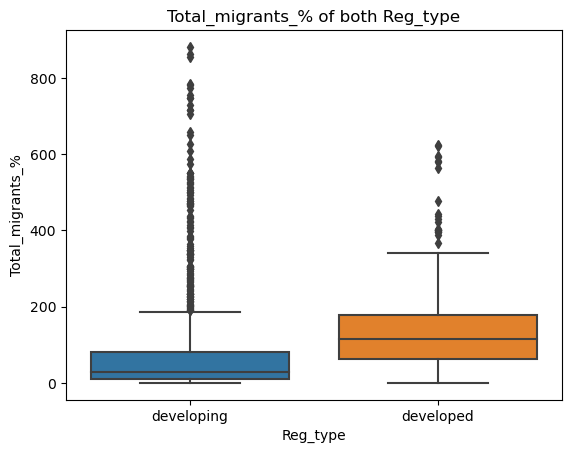

In [17]:
sns.boxplot(x=data_CRS['Reg_type'], y=data_CRS['Total_migrants_%'], data=data_CRS).set(title='Total_migrants_% of both Reg_type')

Let's take a brief look at the data by plotting the distribution of **APR_totalpop** divided by **Reg_type** for the two groups using seaborn's <code>boxplot()</code> function. It also depicts the significant difference.

[Text(0.5, 1.0, 'APR_totalpop of both Reg_type')]

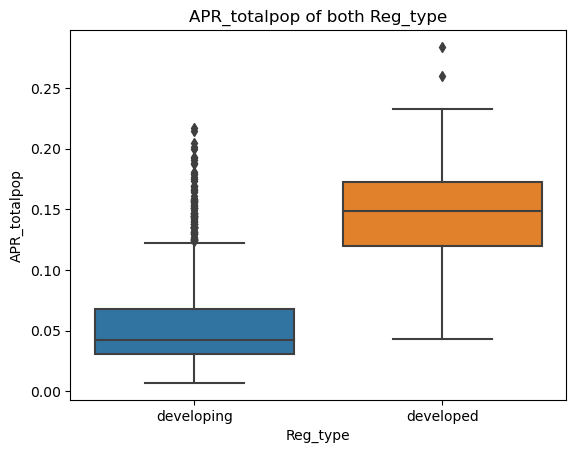

In [18]:
sns.boxplot(x=data_CRS['Reg_type'], y=data_CRS['APR_totalpop'], data=data_CRS).set(title='APR_totalpop of both Reg_type')

Let's take a brief look at the data by plotting the distribution of **WPR_totalpop** divided by **Reg_type** for the two groups using seaborn's <code>boxplot()</code> function. It also depicts the significant difference. 

[Text(0.5, 1.0, 'WPR_totalpop of both Reg_type')]

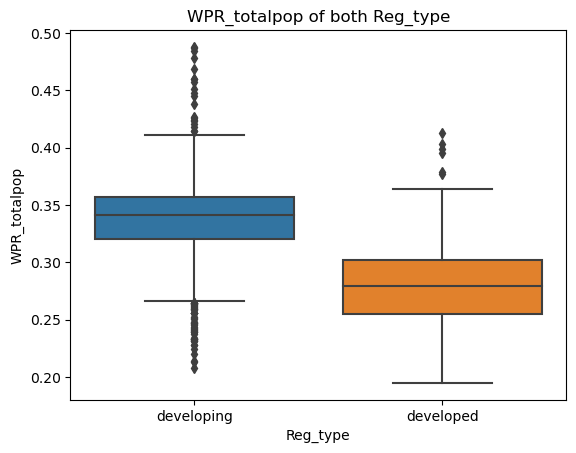

In [19]:
sns.boxplot(x=data_CRS['Reg_type'], y=data_CRS['WPR_totalpop'], data=data_CRS).set(title='WPR_totalpop of both Reg_type')

# 3. Unsupervised ML Models


Here, we would like to choose K-Means Clustering as our basic model to make clustering devision to our records, the results of which is potential to explain the data relationship. The basic model will then be added some regulation and optimization.

The independent vaiables is all newly added proportions of certain group, 6 in all. That is:

* WPR_migrants                                1388 non-null   float64
* WPR_totalpop                                1388 non-null   float64
* APR_migrants                                1388 non-null   float64
* APR_totalpop                                1388 non-null   float64
* Total_migrants_%                            1388 non-null   float64
* Reg_type                                    1388 non-null   object 

The last is a categorial variable with just two unique values. We will assign '0' to the 'developing', and '1' to the 'developed', known as feature binarization. **This roadmap makes it convenient to do mean statistics for interpretation purpose**.

In [20]:
data_CRS.loc[data_CRS['Reg_type']=='developing', 'Reg_type'] = 0
data_CRS.loc[data_CRS['Reg_type']=='developed', 'Reg_type'] = 1
data_CRS['Reg_type'] = data_CRS['Reg_type'].astype(float)
data_CRS.describe()

APR_migrants  APR_totalpop  WPR_migrants  WPR_totalpop  \
count   1388.000000   1388.000000   1388.000000   1388.000000   
mean       0.096059      0.074157      0.349487      0.326517   
std        0.090714      0.052369      0.100278      0.042492   
min        0.002396      0.006856      0.021601      0.194817   
25%        0.036605      0.032921      0.286684      0.302249   
50%        0.062834      0.051007      0.357319      0.333150   
75%        0.122342      0.109964      0.414486      0.353385   
max        0.660949      0.283973      0.735315      0.487988   

       Total_migrants_%     Reg_type  
count       1388.000000  1388.000000  
mean          94.021682     0.196686  
std          136.494683     0.397636  
min            0.266982     0.000000  
25%           12.368033     0.000000  
50%           38.354268     0.000000  
75%          117.628700     0.000000  
max          881.292162     1.000000

The first 5 variables and the newly transformed one are numerical variables, so standard scaling rather than encoding is necessary:

In [21]:
scaler = StandardScaler()
data_CRS_ = pd.DataFrame(scaler.fit_transform(data_CRS), index=data_CRS.index, columns=data_CRS.columns)
data_CRS_.describe()

APR_migrants  APR_totalpop  WPR_migrants  WPR_totalpop  \
count  1.388000e+03  1.388000e+03  1.388000e+03  1.388000e+03   
mean   8.214691e-17 -4.555274e-17  1.863703e-16 -3.293075e-16   
std    1.000360e+00  1.000360e+00  1.000360e+00  1.000360e+00   
min   -1.032885e+00 -1.285584e+00 -3.270937e+00 -3.100521e+00   
25%   -6.556375e-01 -7.877014e-01 -6.265186e-01 -5.713125e-01   
50%   -3.663978e-01 -4.422241e-01  7.813396e-02  1.561542e-01   
75%    2.898308e-01  6.839686e-01  6.484145e-01  6.325369e-01   
max    6.229397e+00  4.007887e+00  3.848958e+00  3.801379e+00   

       Total_migrants_%      Reg_type  
count      1.388000e+03  1.388000e+03  
mean       6.251004e-17 -2.328829e-15  
std        1.000360e+00  1.000360e+00  
min       -6.871219e-01 -4.948162e-01  
25%       -5.984341e-01 -4.948162e-01  
50%       -4.079828e-01 -4.948162e-01  
75%        1.730143e-01 -4.948162e-01  
max        5.769853e+00  2.020953e+00

Let's check the relationships between these variables using seaborn's <code>pairplot()</code> function. We can see, there is some correlations between the variables, especially among **WPR_migrants** and **APR_migrants**. **Thus we have redundant data**, consulting our empericial knowledge on the relationship of **WPR** and **APR**.

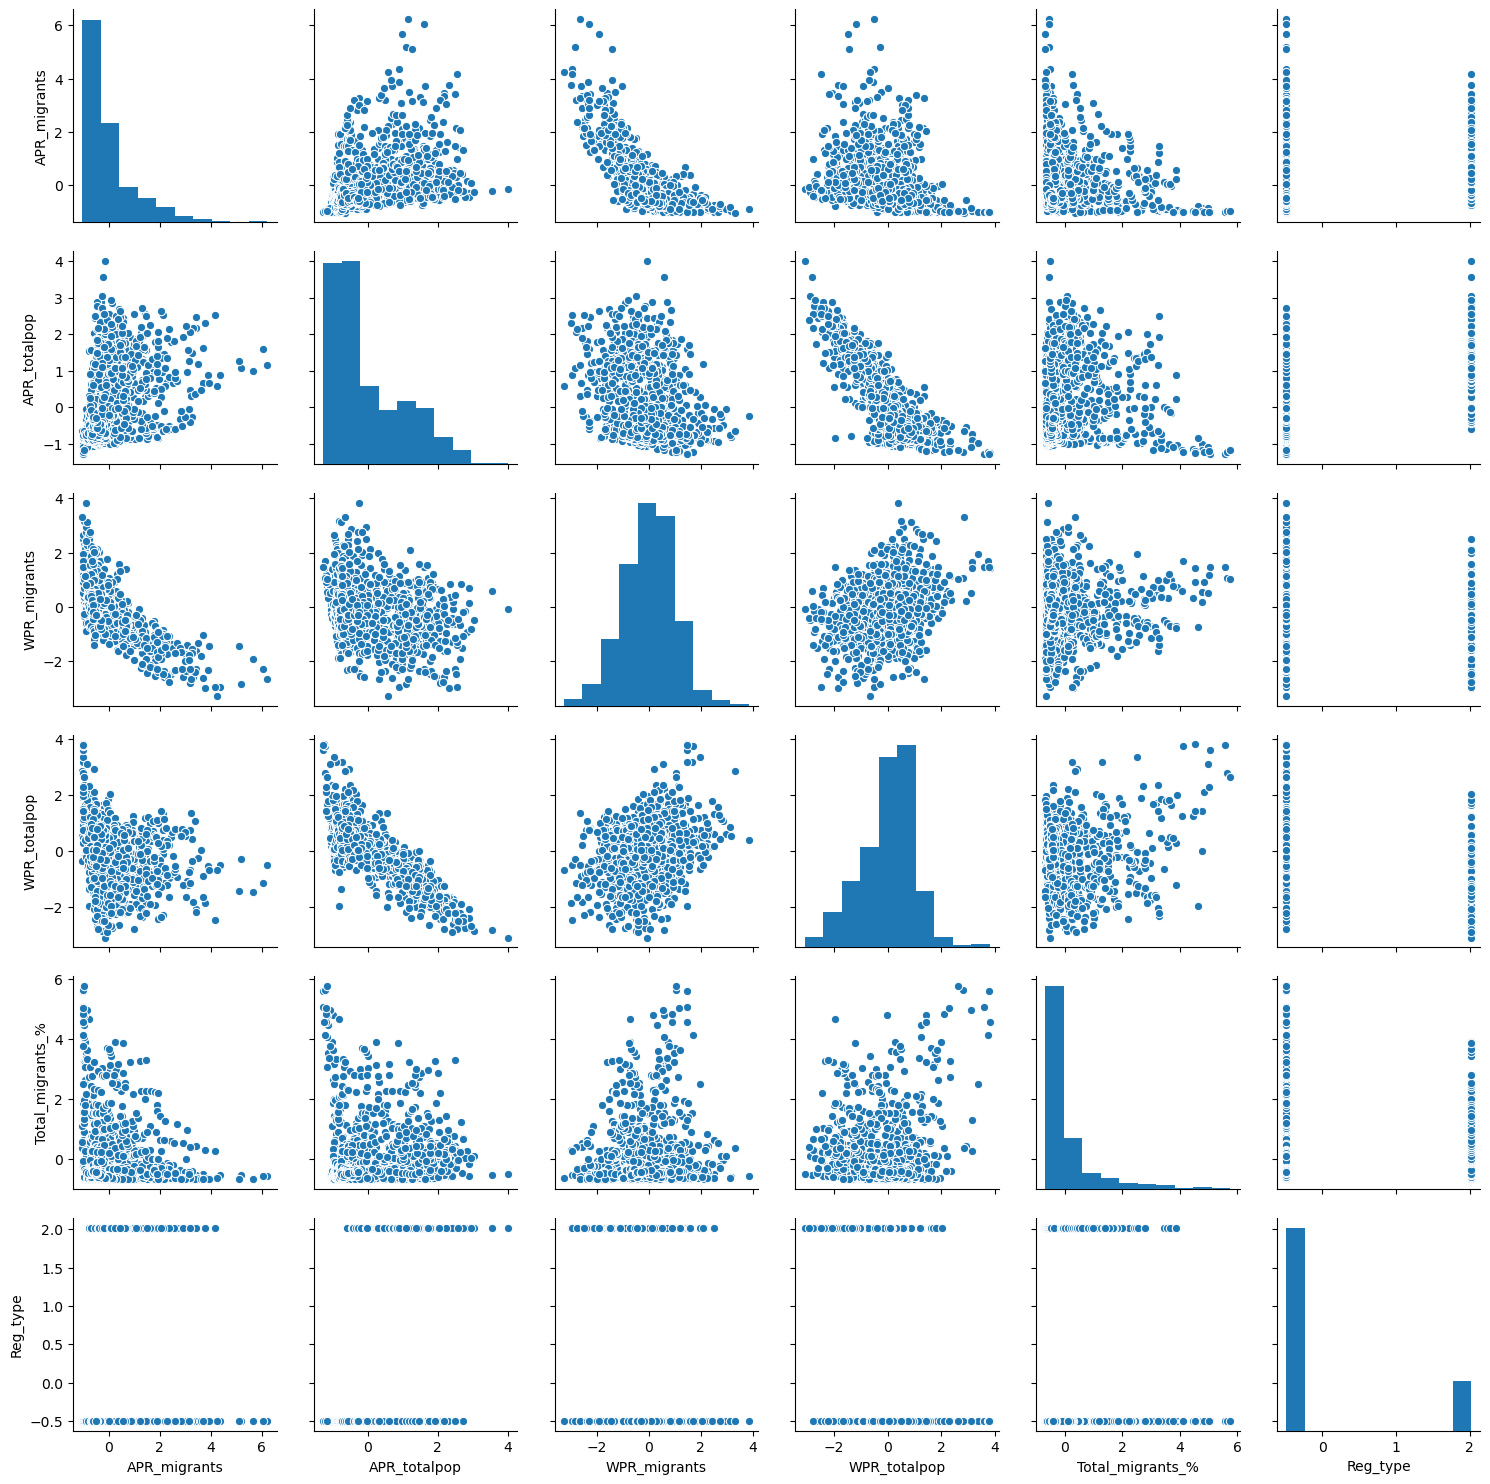

In [22]:
sns.pairplot(data_CRS_)

It's time to apply PCA, let's apply PCA keeping the dimension 2 less than the original data, consulting the correlations between **WPR** and **APR** in 2 cases. Then, find the projection of the dataset onto the principal components and call it Xhat, which will be our 'new' dataset. We concatenate these new datasets on principal component with our original datasets to form a table.

In [23]:
k = 4
pca = PCA(n_components=k)
pca.fit(data_CRS_)
#Xhat = pca.transform(data_CRS_)
#data_CRS_PCA = pd.DataFrame(columns=[f'Projection on Component {i+1}' for i in range(len(data_CRS_.columns))], data=Xhat)
Xhat = pd.DataFrame(pca.transform(data_CRS_), columns=['PC{}'.format(i+1) for i in range(k)])
data_CRS_PCA = pd.concat([data_CRS_, Xhat], axis=1)
data_CRS_PCA.head()

APR_migrants  APR_totalpop  WPR_migrants  WPR_totalpop  Total_migrants_%  \
0     -0.552733     -0.890167      0.414815     -0.132302         -0.240217   
1     -0.552782     -0.931170      0.414810     -0.643365         -0.377105   
2     -0.485489     -0.939331      0.550346     -0.450312         -0.544740   
3     -0.579014     -0.981760     -0.103447      0.384184         -0.497245   
4     -0.524693     -1.003780     -0.107635      0.924402         -0.480148   

   Reg_type       PC1       PC2       PC3       PC4  
0 -0.494816 -1.016195 -0.037341 -0.294835 -0.380248  
1 -0.494816 -0.804168 -0.083755 -0.553581 -0.663258  
2 -0.494816 -0.937791 -0.013628 -0.671474 -0.506538  
3 -0.494816 -1.139421  0.459974 -0.244369  0.004501  
4 -0.494816 -1.383547  0.603789 -0.065742  0.343763

Here is our Principal Component Loading Matrix. We can see that for **PC1**, **APR_totalpop** counts most, then **WPR_totalpop**, then **Reg_type** and **APR_migrants**, so on and so forth.

In [24]:
components = pd.DataFrame(pca.components_, columns=data_CRS_.columns)
components = pd.concat([pd.DataFrame({'PC':['PC1','PC2','PC3','PC4']}), components], axis=1)
components.set_index('PC', inplace=True)
components

APR_migrants  APR_totalpop  WPR_migrants  WPR_totalpop  Total_migrants_%  \
PC                                                                              
PC1      0.410404      0.529025     -0.388077     -0.476928          0.073083   
PC2      0.521824     -0.219122     -0.541350      0.212978         -0.390610   
PC3      0.176974     -0.136358     -0.251056      0.276972          0.896936   
PC4      0.149396     -0.131534     -0.025054      0.613210         -0.182579   

     Reg_type  
PC             
PC1  0.410240  
PC2 -0.434383  
PC3 -0.076488  
PC4  0.741883

Let's check the relationships between these variables using seaborn's <code>pairplot()</code> function. We can see the points with **PCi** (i=1,2,3,4) appear more decorrelated. We now can obtained features that are more linearly independent of each other if focusing on these derived variables.

Our focus is now attached onto the **PC1**, **PC2**, **PC3** and **PC4** to carry out the attention to the variables of **APR_migrants**, **APR_totalpop**, **WPR_migrants**, **WPR_totalpop**, **Total_migrants_%** and **Reg_type**.

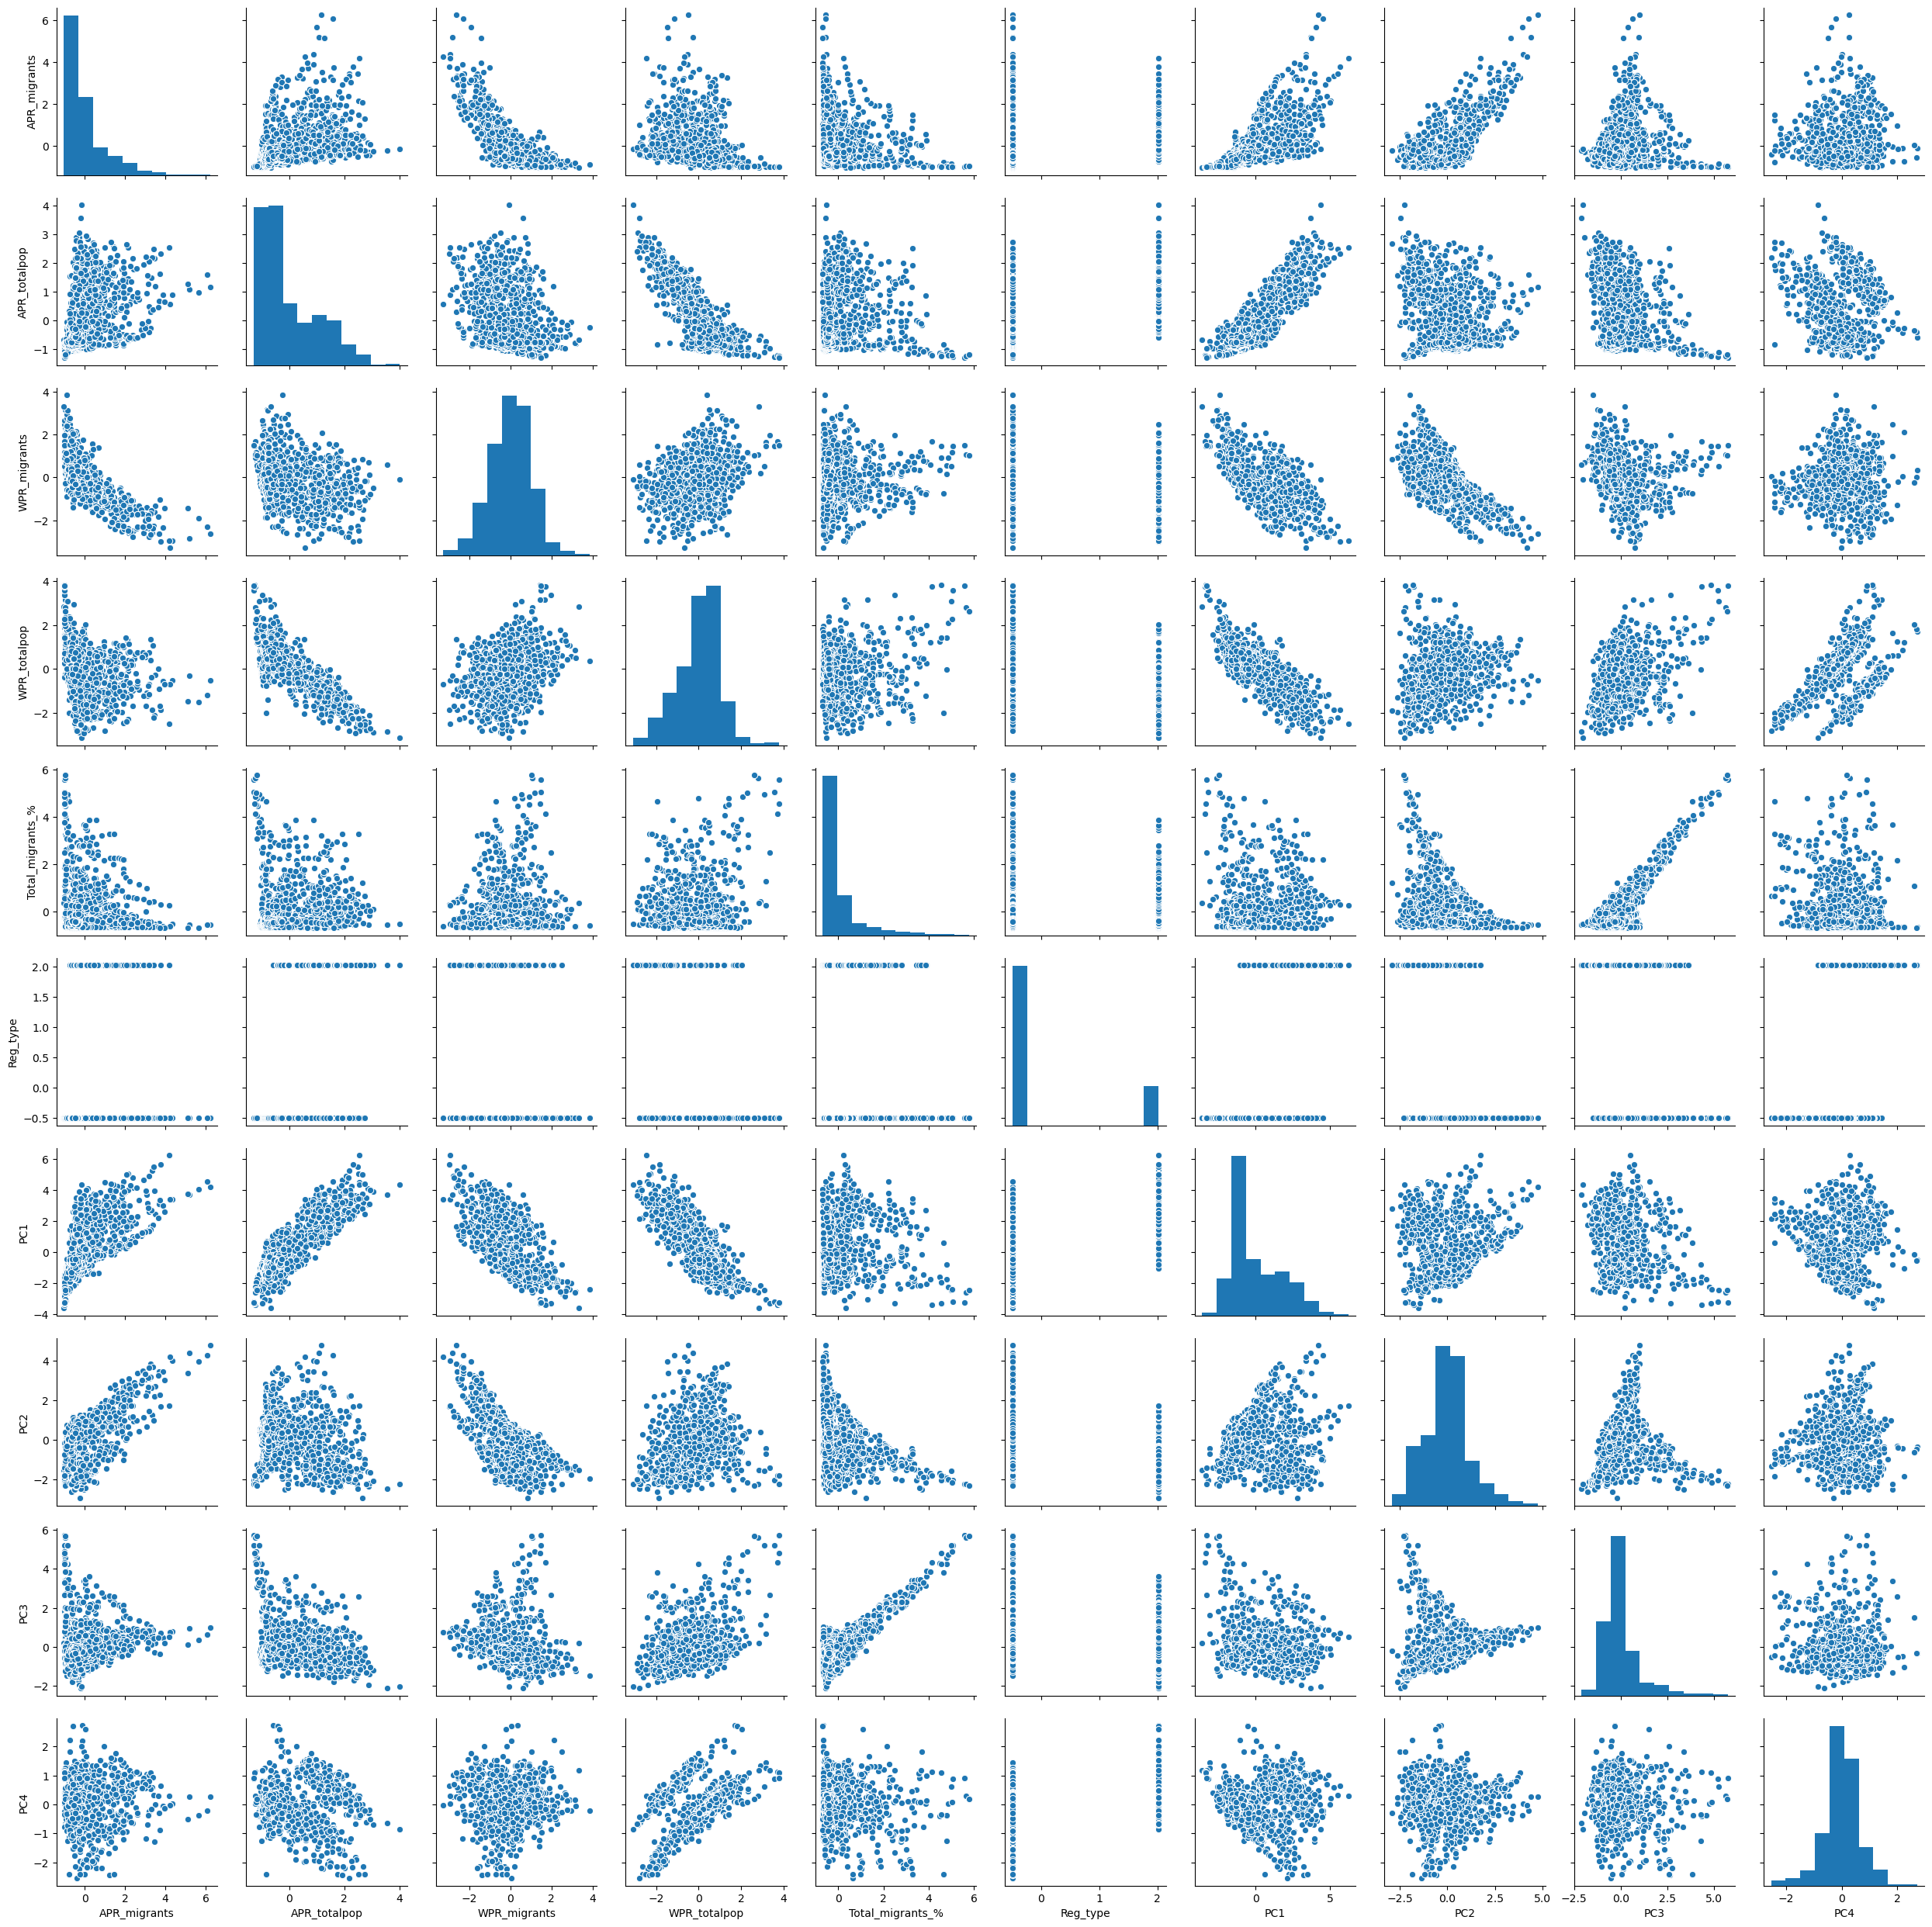

In [25]:
sns.pairplot(data_CRS_PCA)

The distribution of values of the **PCi** does not look very skewed. And to preventing any further variance among the feature value, we currently skip the normalization such as box cox transformation. Such dataset is ready for clustering. We select the column of **PC1**, **PC2**, **PC3** and **PC4** out into X:

In [30]:
X = data_CRS_PCA[['PC1', 'PC2', 'PC3', 'PC4']]

We set an explicit function to measure the output quality of the unsupervised clustering. And based on that, we set dict variables to record outputs during the modeling fitting.

In [86]:
def get_accuracy(model):
    return model.inertia_
    
REC = {}

We also set the function below to plot the relation table **for the interpretation purpose**. We will use it to calculate the mean value grouped by cluster for each field, and sort the table descendingly based on what we are interested in.

In [82]:
cluster = ''

def interpretab(model, sort_field):
    table = data_CRS_PCA.copy()
    table['cluster'] = model.labels_
    table_ = table.groupby('cluster').mean().sort_values(by=[sort_field], ascending=False)
    plt.figure()
    sns.heatmap(table_[['APR_migrants','APR_totalpop','WPR_migrants','WPR_totalpop','Total_migrants_%','Reg_type']], annot=True, cmap='Blues')
    plt.show()
    plt.close()

Let's create a K-Means object expected to set 2 groups, called km2. Then fit the model with multiple features on our X dataset. We will calculate the inertia to evaluation the model parameter. We will also append the clusters to the X dataset using the function <code>interpretab()</code> for further interpreting analysis. 

From the table, we see that there are 2 clusters generated by the K-Means analysis, each cluster contains the scaled average percentage of developed regions (**Reg_type**=1). The heat map can diclose interpretative relationships. For instance, cluster 1 with higher average **Reg_type**, has higher average **APR_totalpop** and lower average **WPR_totalpop**.

In [79]:
km2 = KMeans(n_clusters=2)  # n_init, number of times the K-mean algorithm will run
km2.fit(X)
#REC['K-Means 2 Clusters'] = get_accuracy(km2)
print('Inertia = ' + str(get_accuracy(km2)))

Inertia = 4642.592318850251


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/e

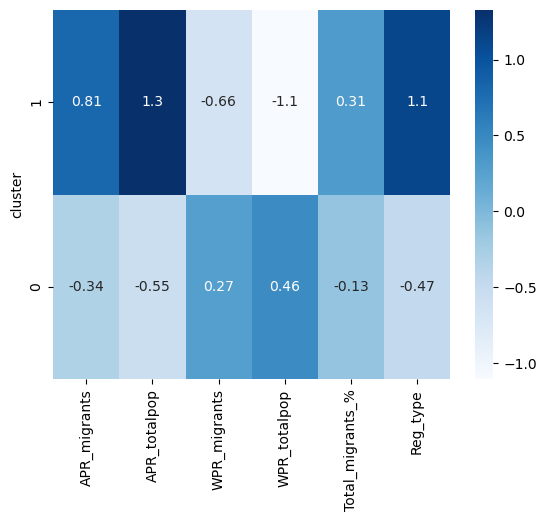

In [83]:
interpretab(km2, 'Reg_type')

Let's create a K-Means object expected to set 3 groups, called km3. Then fit the model with multiple features on our X dataset. We will calculate the inertia to evaluation the model parameter. We will also append the clusters to the X dataset using the function <code>interpretab()</code> for further interpreting analysis. 

From the table, we see that there are 3 clusters generated by the K-Means analysis, each cluster contains the scaled average percentage of developed regions (**Reg_type**=1). The heat map can also diclose some interpretative relationships. The conclusion is just similar (cluster 1 with the highest average **Reg_type**, has the highest average **APR_totalpop** and the lowest average **WPR_totalpop**).

In [84]:
km3 = KMeans(n_clusters=3)  # n_init, number of times the K-mean algorithm will run
km3.fit(X)
#REC['K-Means 3 Clusters'] = get_accuracy(km3)
print('Inertia = ' + str(get_accuracy(km3)))

Inertia = 3674.462025732412


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/e

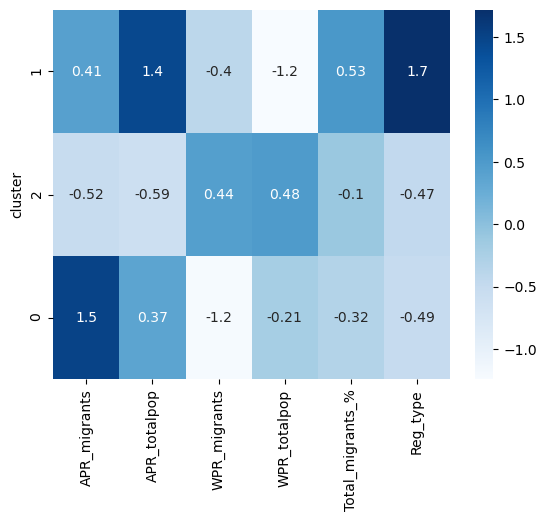

In [85]:
interpretab(km3, 'Reg_type')

Let's create a K-Means object expected to set 10 groups, called km10. Then fit the model with multiple features on our X dataset. We will calculate the inertia to evaluation the model parameter. We will also append the clusters to the X dataset using the function <code>interpretab()</code> for further interpreting analysis. 

From the table, we see that there are 10 clusters generated by the K-Means analysis, each cluster contains the scaled average percentage of developed regions (**Reg_type**=1). The heat map can also diclose some interpretative relationships. The conclusion is just similar (cluster 1~2 with the highest average **Reg_type**, has the highest average **APR_totalpop** and the lowest average **WPR_totalpop**).

In [87]:
km10 = KMeans(n_clusters=10)  # n_init, number of times the K-mean algorithm will run
km10.fit(X)
#REC['K-Means 10 Clusters'] = get_accuracy(km10)
print('Inertia = ' + str(get_accuracy(km10)))

Inertia = 1518.027265913524


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/e

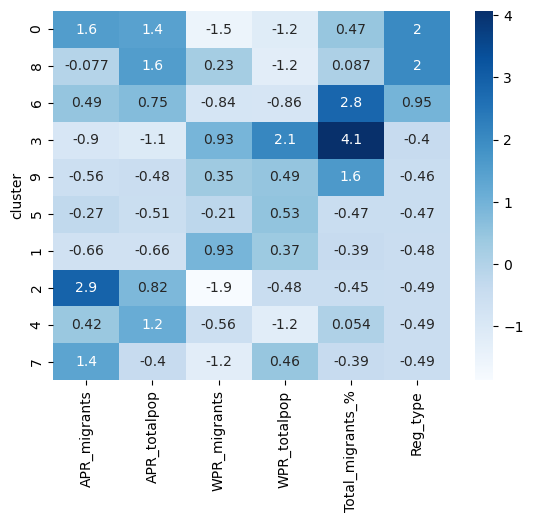

In [88]:
interpretab(km10, 'Reg_type')

Now, let's write codes that calculates the inertia for 1 to 30 clusters, and plot the inertia as a function of the number of clusters.

In [101]:
REC = {}
list_num_clusters = list(range(1, 30+1))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    REC[str(num_clusters) + ' Clusters'] = get_accuracy(km)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/e

<function matplotlib.pyplot.show(close=None, block=None)>

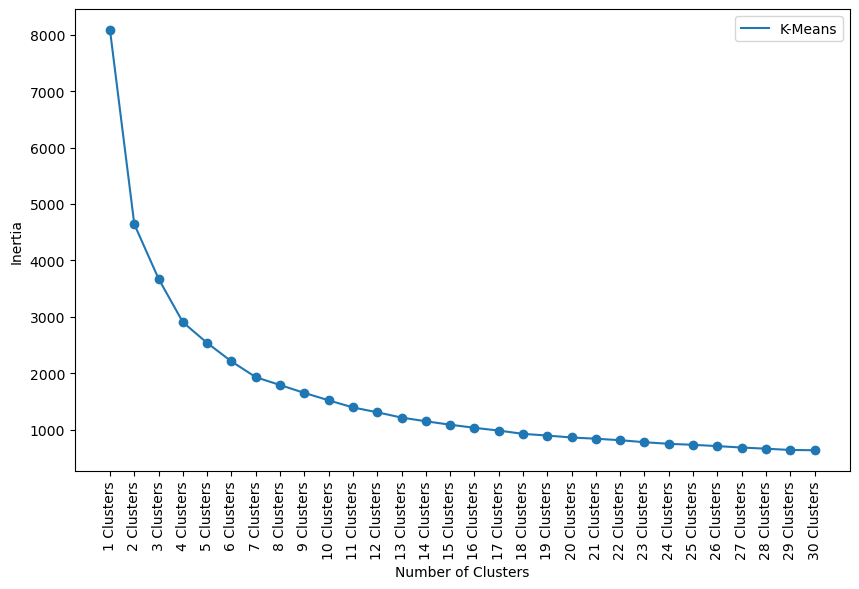

In [103]:
y_values = list(REC.values())
x_values = list(REC.keys())
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='K-Means')
plt.scatter(x_values, y_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(rotation=90)
plt.legend()
plt.show

The summary of prediction can be printed as:

In [106]:
INTA_ = pd.DataFrame.from_dict(REC, orient='index')
INTA_.rename(columns={0: 'INERTIA'}, inplace=True)
INTA_

INERTIA
1 Clusters   8081.759018
2 Clusters   4642.592319
3 Clusters   3674.437604
4 Clusters   2904.542070
5 Clusters   2536.571007
6 Clusters   2209.774381
7 Clusters   1930.566974
8 Clusters   1790.972334
9 Clusters   1651.230602
10 Clusters  1519.968681
11 Clusters  1393.552339
12 Clusters  1307.993040
13 Clusters  1213.706657
14 Clusters  1148.540811
15 Clusters  1087.624838
16 Clusters  1032.416944
17 Clusters   983.531682
18 Clusters   925.418956
19 Clusters   895.169477
20 Clusters   860.867482
21 Clusters   839.113452
22 Clusters   812.917957
23 Clusters   777.271898
24 Clusters   748.706098
25 Clusters   731.259943
26 Clusters   707.923854
27 Clusters   682.860495
28 Clusters   662.417619
29 Clusters   639.561343
30 Clusters   635.155529

As it dipicts, the elbow of the curve occur at 15 Clusters. Let's create a K-Means object expected to set 15 groups, called km15. Then fit the model with multiple features on our X dataset. We will calculate the inertia to evaluation the model parameter. We will also append the clusters to the X dataset using the function <code>interpretab()</code> for further interpreting analysis.

From the table, we see that there are 10 clusters generated by the K-Means analysis, each cluster contains the scaled average percentage of developed regions (**Reg_type**=1). The heat map can also diclose some interpretative relationships. The conclusion is just similar.

In [104]:
km15 = KMeans(n_clusters=15)  # n_init, number of times the K-mean algorithm will run
km15.fit(X)
#REC['K-Means 15 Clusters'] = get_accuracy(km15)
print('Inertia = ' + str(get_accuracy(km15)))

Inertia = 1084.171979639771


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/e

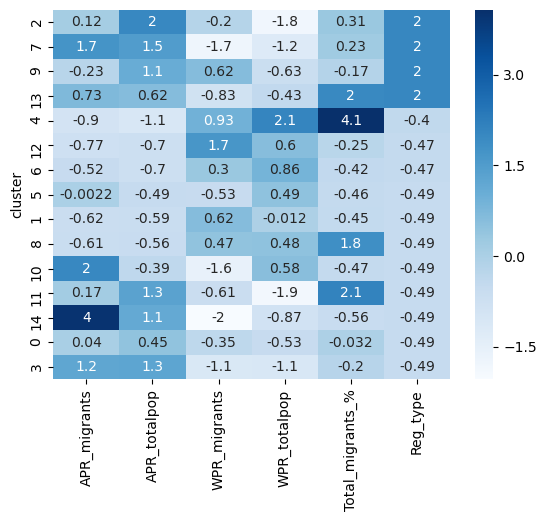

In [105]:
interpretab(km15, 'Reg_type')

So far, we can conclude that **APR_totalpop** and **WPR_totalpop** is the most important factor relating to **Reg_type**. The age patterns of total population contribute more to indicate whether their place is developed regions or not, compared with the rest.

# 4. Insights and key findings


In our superficially constructed K-Means models, the output with most best clustering result was always getting better if using more n_components. As number of clusters increases from 1, the inertia value goes down very rapidly at first. But after it reaches 15 the rate of decrease slows down. This slowing down indicate to us a natural point in our data set where the number of groupings make sense and should serve as a logical choice hyperparameter of K-Means models.

During our exploration using different value of n_components, the interpretation findings are just similar. All of the heat maps disclose the uniform interpretative relationships between age patterns of total population and the development status of region. The clusters with higher average values of **Reg_type**, always have higher average values of **APR_totalpop** and lower average values of **WPR_totalpop**, no matter how the number of clusters is altering.

Key findings: the K-Means models that can reach the lowest inertia value seems beyond reach if the increase of number of clusters always increases. But there is an elbow of the curve occur at 15 Clusters which indicates the best efficiency choice of the hyperparameter of K-Means models. And no matter how the number of clusters changes, the positive relationship between **APR_totalpop** and how well the region develops never changes, so does it with the negative relationship from **WPR_totalpop**.

As to our dataset for the study case, the age pattern of total population contributes more to explain whether a region is developed or developing. Among the key indicators, the Working Population (low-aged) Rate (proportion of age 15 to 34) of total population and the Ageing Population Rate (proportion of age not less than 65) of total population play the largest part, and the influence produced by the two is contrast.

# 5. Next Steps


From the conclusions above, **there is phenomenal correlations between the region type and age pattern of population**.

There are some other fields and rows in this data which we has dropped. For example, the rows representing the where the country/area type such as 'Developed regions', 'Less developed regions', 'Less developed regions, excluding least developed countries', 'Less developed regions, excluding China', 'Least developed countries', 'Land-locked Developing Countries (LLDC)', 'Small island developing States (SIDS)', 'High-income countries', 'Middle-income countries', 'Upper-middle-income countries', 'Lower-middle-income countries', 'Low-income countries', where 'Type of data' is not non-null. These classifications may provide additional views for interpreting the model.

The quality of the data of <code>undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx</code> still need refinement, due to its relative large time grains of five years. Such container of sliced data is not continous enough that may contain contingency.

For next steps, **it may be helpful to draw precise conclusions if every-year data of total population and migrant stock between 1990 and 2020 can be provided**. And it will provoke more thinkings on mechanisms with such additional data as the **growth rate of each proportion by age group derived**. Insights from these further analysis can help us in decision making when it comes to comprehending population aging and the development status of a region.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
